In [219]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.mixture import BayesianGaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
from math import sin, cos, atan2, sqrt
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, TimeSeriesSplit
from sklearn.metrics import accuracy_score
import lightgbm as lgb
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore", category=Warning)

### Đọc dữ liệu

In [220]:
df = pd.read_csv('data-kiem-tra-2.csv', encoding='latin-1', sep=',')
df.head(5)

,date,truong_1,truong_2,truong_3,truong_4,truong_5
0,10.05.2013,4,58,3773,299.0,1
1,26.05.2013,4,58,3768,249.0,1
2,19.05.2013,4,58,4036,419.0,1
3,25.05.2013,4,58,12878,149.0,1
4,15.05.2013,4,58,12885,148.0,1


### Trực quan hóa dữ liệu

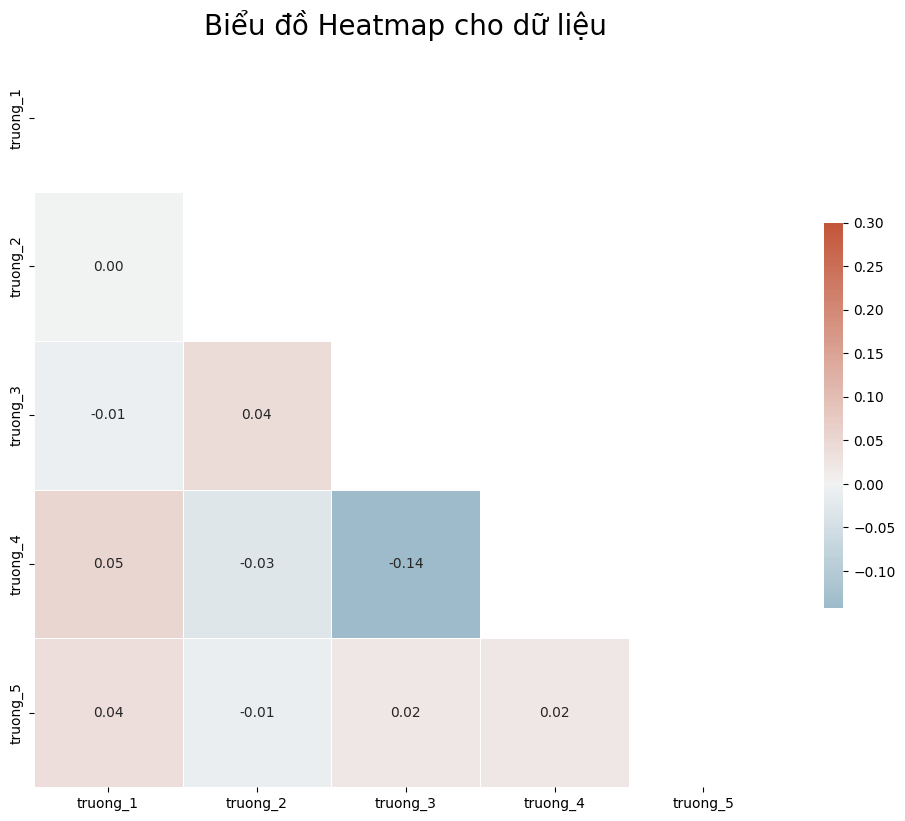

In [221]:
import seaborn as sns
import matplotlib.pyplot as plt

df_toheat = df.drop(labels='date', axis=1)
corr = df_toheat.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f")
plt.title('Biểu đồ Heatmap cho dữ liệu', fontsize=20)
plt.show()


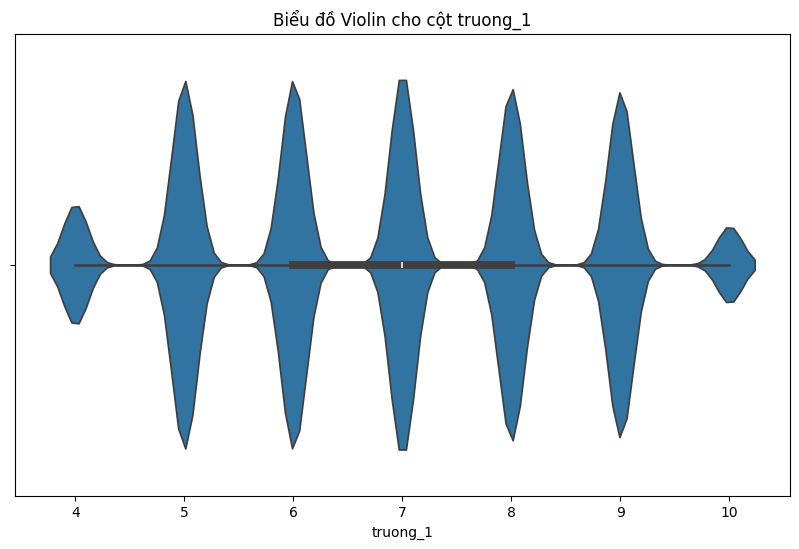

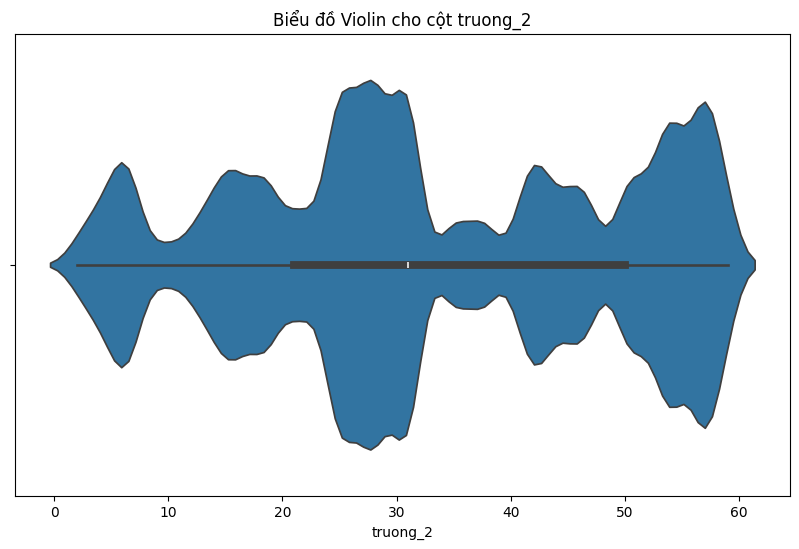

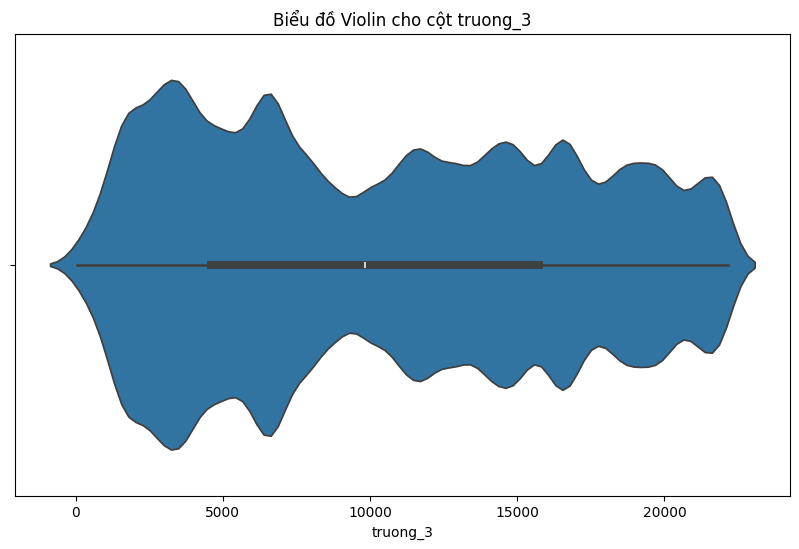

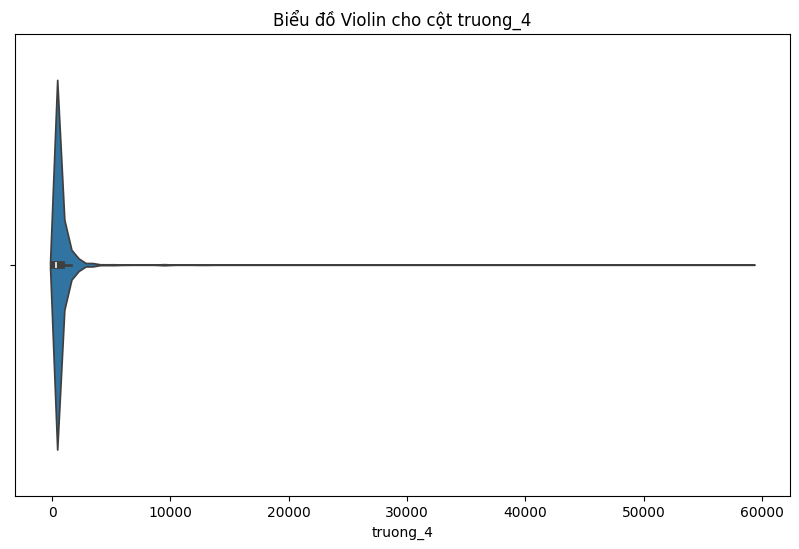

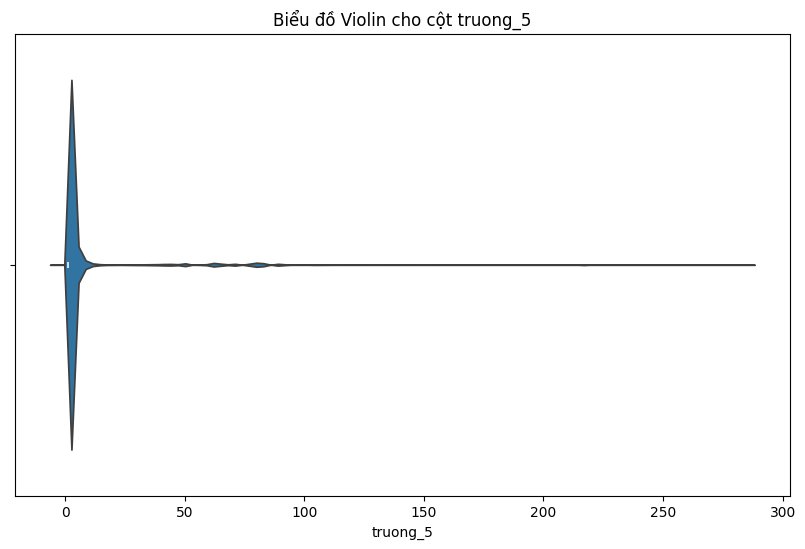

In [222]:
# Tạo biểu đồ violin cho từng cột để xem phân phối và mật độ của dữ liệu
for column in df.columns[1:]:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x=df[column])
    plt.title(f'Biểu đồ Violin cho cột {column}')
    plt.show()


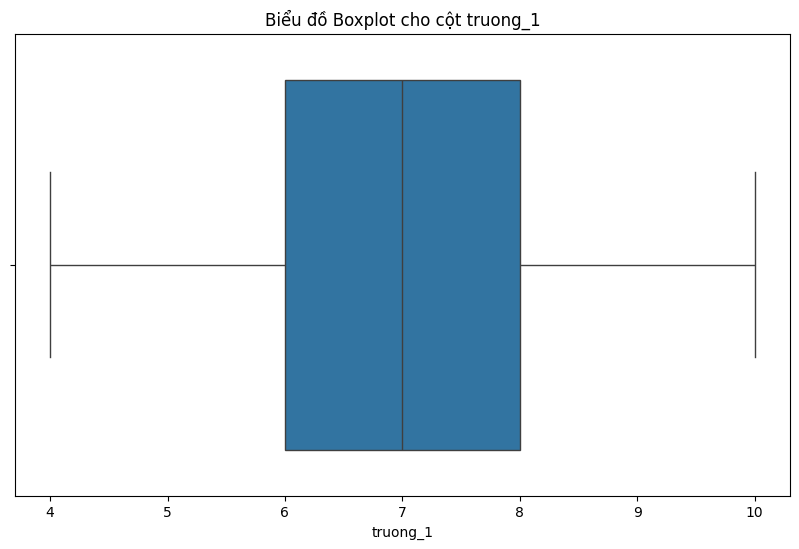

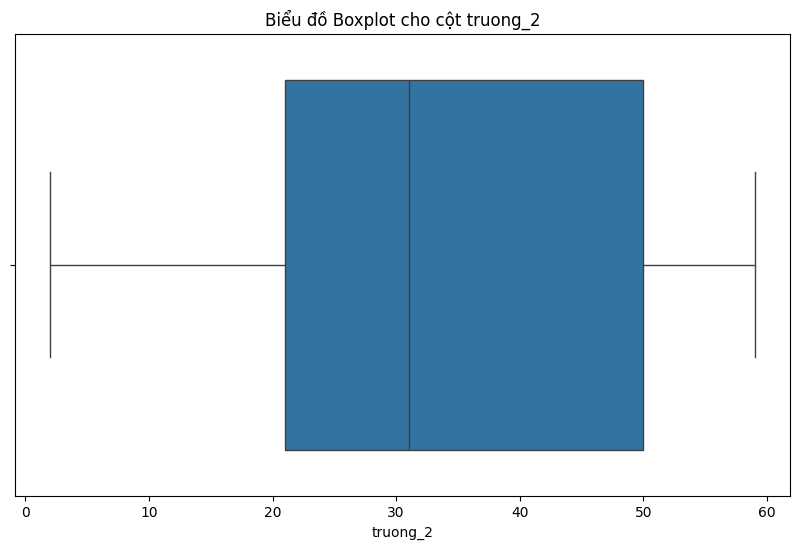

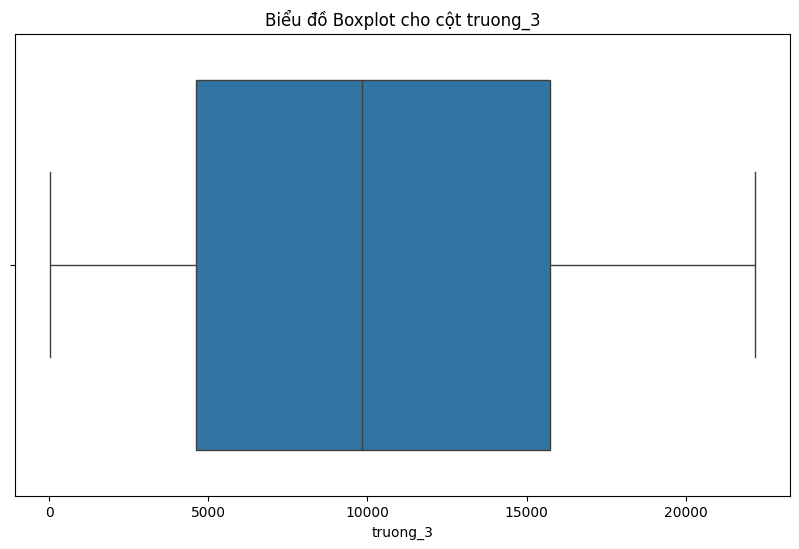

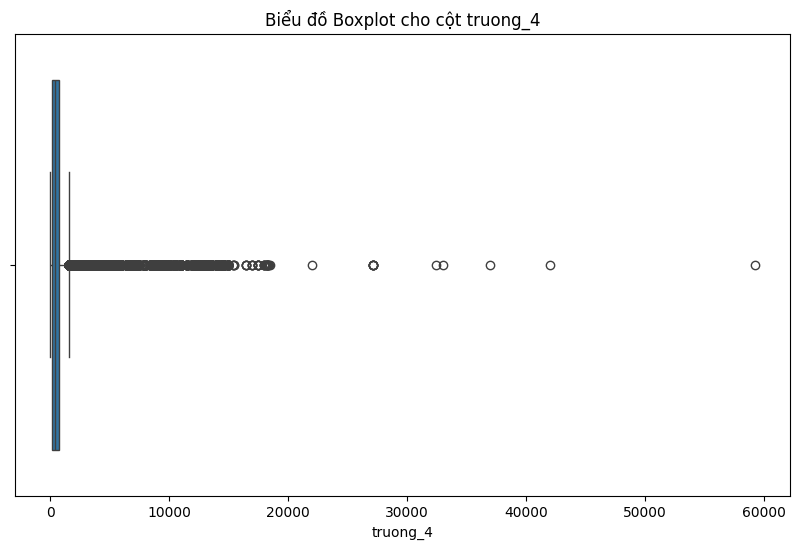

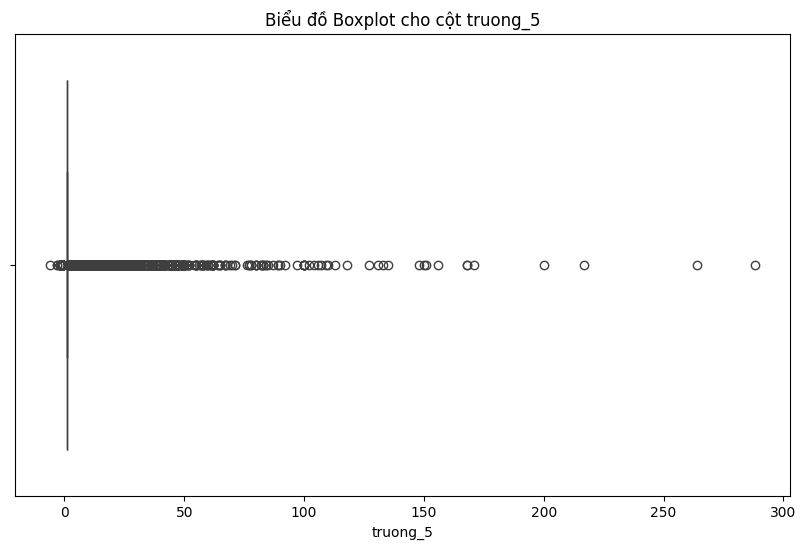

In [223]:
# Tạo biểu đồ boxplot cho từng cột
for column in df.columns[1:]:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Biểu đồ Boxplot cho cột {column}')
    plt.show()

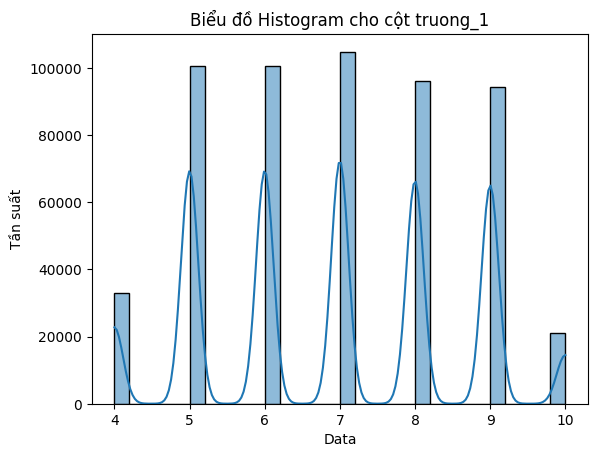

In [224]:
# Tạo biểu đồ histogram bằng seaborn
sns.histplot(df['truong_1'], bins=30, kde=True)

# Thêm tiêu đề và nhãn trục
plt.title('Biểu đồ Histogram cho cột truong_1')
plt.xlabel('Data')
plt.ylabel('Tần suất')

# Hiển thị biểu đồ
plt.show()

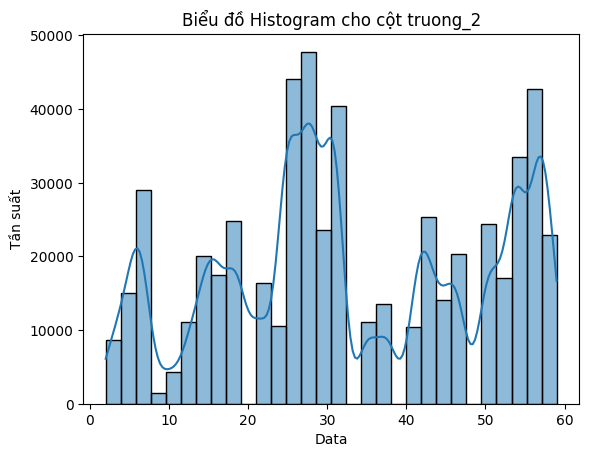

In [225]:
# Tạo biểu đồ histogram bằng seaborn
sns.histplot(df['truong_2'], bins=30, kde=True)

# Thêm tiêu đề và nhãn trục
plt.title('Biểu đồ Histogram cho cột truong_2')
plt.xlabel('Data')
plt.ylabel('Tần suất')

# Hiển thị biểu đồ
plt.show()

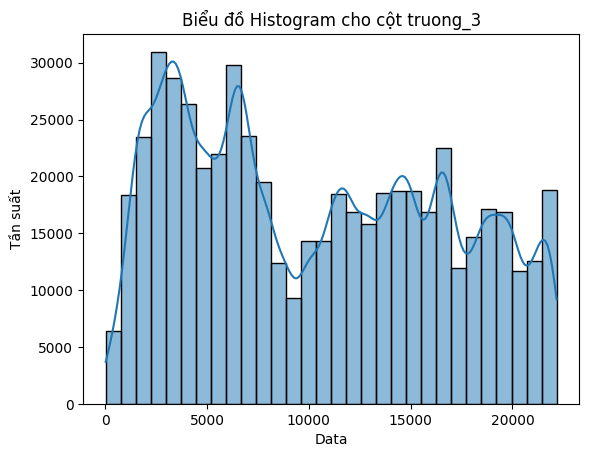

In [226]:
# Tạo biểu đồ histogram bằng seaborn
sns.histplot(df['truong_3'], bins=30, kde=True)

# Thêm tiêu đề và nhãn trục
plt.title('Biểu đồ Histogram cho cột truong_3')
plt.xlabel('Data')
plt.ylabel('Tần suất')

# Hiển thị biểu đồ
plt.show()

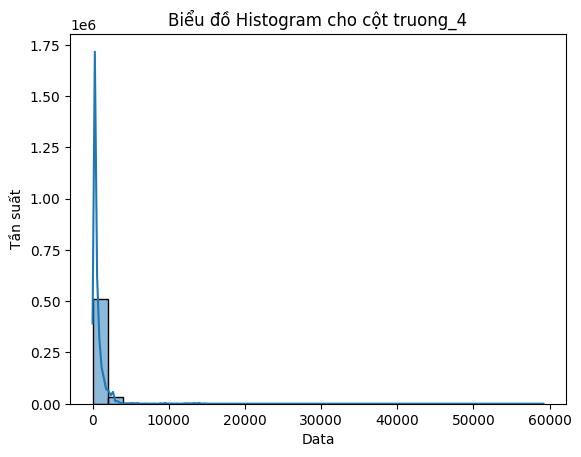

In [227]:
# Tạo biểu đồ histogram bằng seaborn
sns.histplot(df['truong_4'], bins=30, kde=True)

# Thêm tiêu đề và nhãn trục
plt.title('Biểu đồ Histogram cho cột truong_4')
plt.xlabel('Data')
plt.ylabel('Tần suất')

# Hiển thị biểu đồ
plt.show()

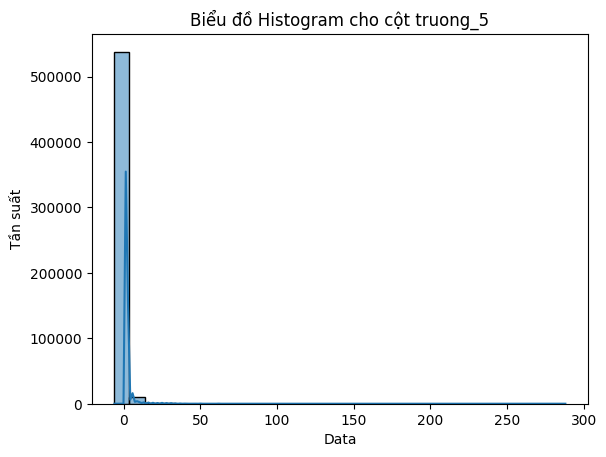

In [228]:
# Tạo biểu đồ histogram bằng seaborn
sns.histplot(df['truong_5'], bins=30, kde=True)

# Thêm tiêu đề và nhãn trục
plt.title('Biểu đồ Histogram cho cột truong_5')
plt.xlabel('Data')
plt.ylabel('Tần suất')

# Hiển thị biểu đồ
plt.show()

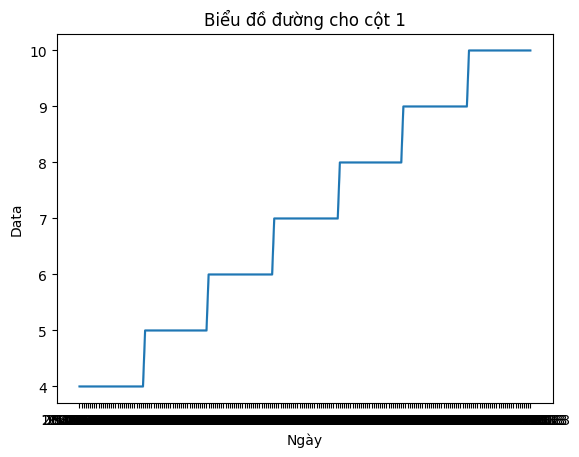

In [229]:
# Tạo biểu đồ đường bằng seaborn
sns.lineplot(x=df['date'], y=df['truong_1'], data=df)

# Thêm tiêu đề và nhãn trục
plt.title('Biểu đồ đường cho cột 1')
plt.xlabel('Ngày')
plt.ylabel('Data')

# Hiển thị biểu đồ
plt.show()

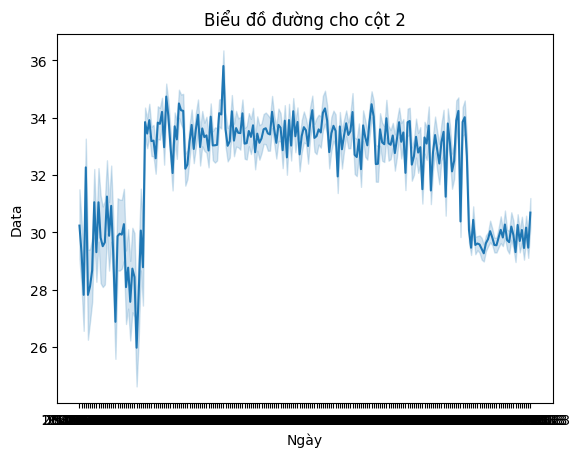

In [230]:
# Tạo biểu đồ đường bằng seaborn
sns.lineplot(x=df['date'], y=df['truong_2'], data=df)

# Thêm tiêu đề và nhãn trục
plt.title('Biểu đồ đường cho cột 2')
plt.xlabel('Ngày')
plt.ylabel('Data')

# Hiển thị biểu đồ
plt.show()

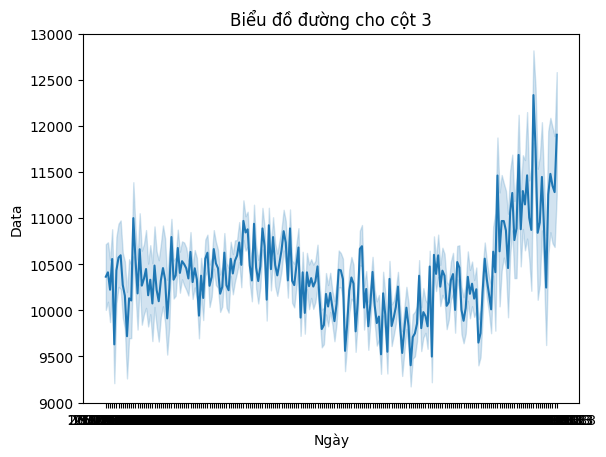

In [231]:
# Tạo biểu đồ đường bằng seaborn
sns.lineplot(x=df['date'], y=df['truong_3'], data=df)

# Thêm tiêu đề và nhãn trục
plt.title('Biểu đồ đường cho cột 3')
plt.xlabel('Ngày')
plt.ylabel('Data')

# Hiển thị biểu đồ
plt.show()

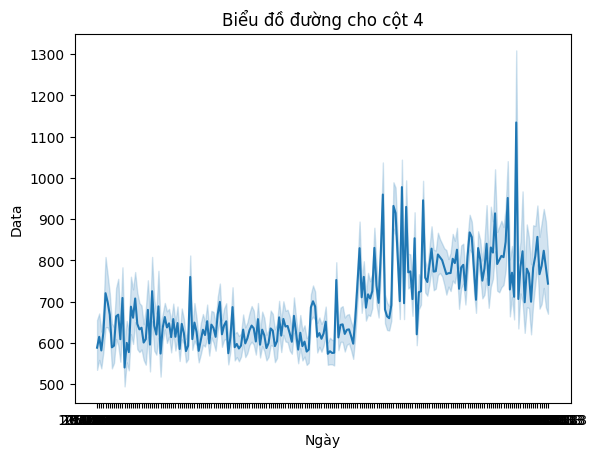

In [232]:
# Tạo biểu đồ đường bằng seaborn
sns.lineplot(x=df['date'], y=df['truong_4'], data=df)

# Thêm tiêu đề và nhãn trục
plt.title('Biểu đồ đường cho cột 4')
plt.xlabel('Ngày')
plt.ylabel('Data')

# Hiển thị biểu đồ
plt.show()

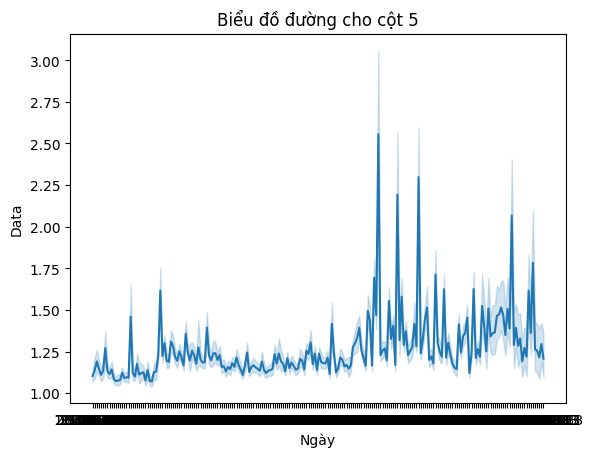

In [233]:
# Tạo biểu đồ đường bằng seaborn
sns.lineplot(x=df['date'], y=df['truong_5'], data=df)

# Thêm tiêu đề và nhãn trục
plt.title('Biểu đồ đường cho cột 5')
plt.xlabel('Ngày')
plt.ylabel('Data')

# Hiển thị biểu đồ
plt.show()

### Tiền xử lí dữ liệu

In [234]:
df = df.drop_duplicates(subset=['date'])

In [235]:
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')
df.set_index('date', inplace=True)

In [236]:
df = df.sort_values(by='date')
df.index = np.arange(1, len(df)+1)



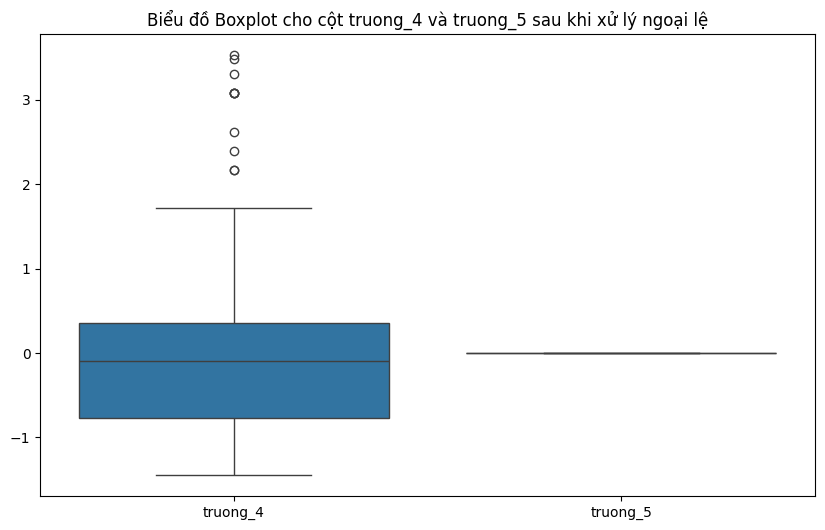

In [237]:
from sklearn.preprocessing import StandardScaler

# Xử lý ngoại lệ cho 'truong_4'
Q1 = df['truong_4'].quantile(0.25)
Q3 = df['truong_4'].quantile(0.75)
IQR = Q3 - Q1

filter = (df['truong_4'] >= Q1 - 1.5 * IQR) & (df['truong_4'] <= Q3 + 1.5 *IQR)
df_clean = df.loc[filter]  

# Xử lý ngoại lệ cho 'truong_5'
Q1 = df_clean['truong_5'].quantile(0.25)
Q3 = df_clean['truong_5'].quantile(0.75)
IQR = Q3 - Q1

filter = (df_clean['truong_5'] >= Q1 - 1.5 * IQR) & (df_clean['truong_5'] <= Q3 + 1.5 *IQR)
df_clean = df_clean.loc[filter]  

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
df_clean[['truong_4', 'truong_5']] = scaler.fit_transform(df_clean[['truong_4', 'truong_5']])

# Vẽ lại biểu đồ boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean[['truong_4', 'truong_5']])
plt.title('Biểu đồ Boxplot cho cột truong_4 và truong_5 sau khi xử lý ngoại lệ')
plt.show()


### Áp dụng mô hình Arimax

In [238]:
pip install pandas statsmodels matplotlib


Note: you may need to restart the kernel to use updated packages.


In [239]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


In [240]:
# Chọn cột 'truong_3' để phân tích chuỗi thời gian và 'truong_4', 'truong_5' làm biến giải thích
time_series = df['truong_3']
exog_vars = df[['truong_4', 'truong_5']]

# Chia dữ liệu thành tập huấn luyện (train) và tập kiểm tra (test)
train_size = int(len(time_series) * 0.8)
train, test = time_series[:train_size], time_series[train_size:]
exog_train, exog_test = exog_vars[:train_size], exog_vars[train_size:]


In [241]:
# Khớp mô hình ARIMAX
p = 1
d = 1
q = 1
arimax_model = ARIMA(train, exog=exog_train, order=(p, d, q))
arimax_fit = arimax_model.fit()


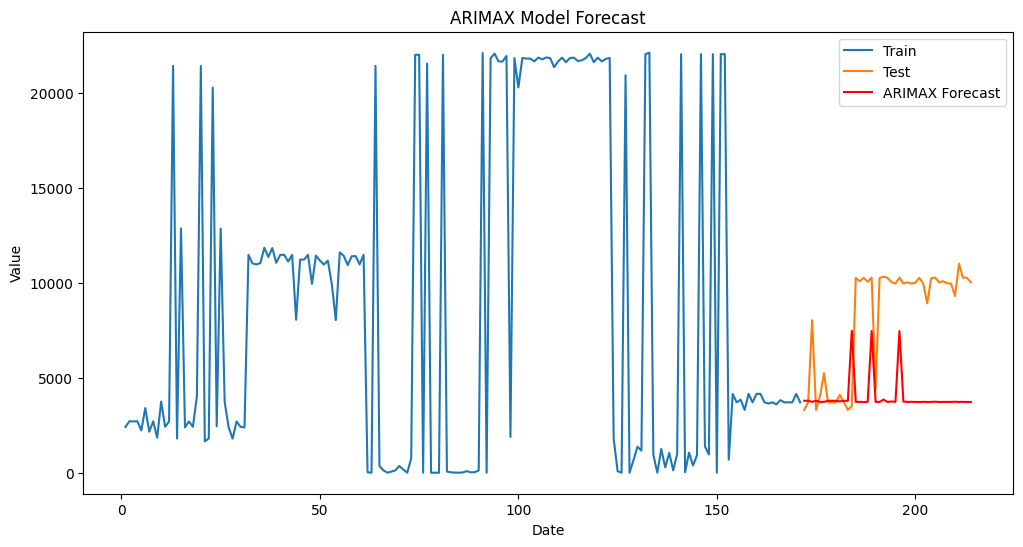

In [242]:
# Dự báo cho tập kiểm tra
forecast_steps = len(test)
arimax_forecast = arimax_fit.forecast(steps=forecast_steps, exog=exog_test)

# Vẽ biểu đồ chuỗi thời gian gốc, tập huấn luyện, tập kiểm tra và dự báo ARIMAX
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test.index, arimax_forecast, label='ARIMAX Forecast', color='red')
plt.title('ARIMAX Model Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


In [243]:
# Tính các độ đo đánh giá
mae = mean_absolute_error(test, arimax_forecast)
mse = mean_squared_error(test, arimax_forecast)
rmse = np.sqrt(mse)

# In các độ đo đánh giá
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')


Mean Absolute Error (MAE): 4410.965356809608
Mean Squared Error (MSE): 26536761.338833526
Root Mean Squared Error (RMSE): 5151.384409926474


### Áp dụng mô hình SARIMA

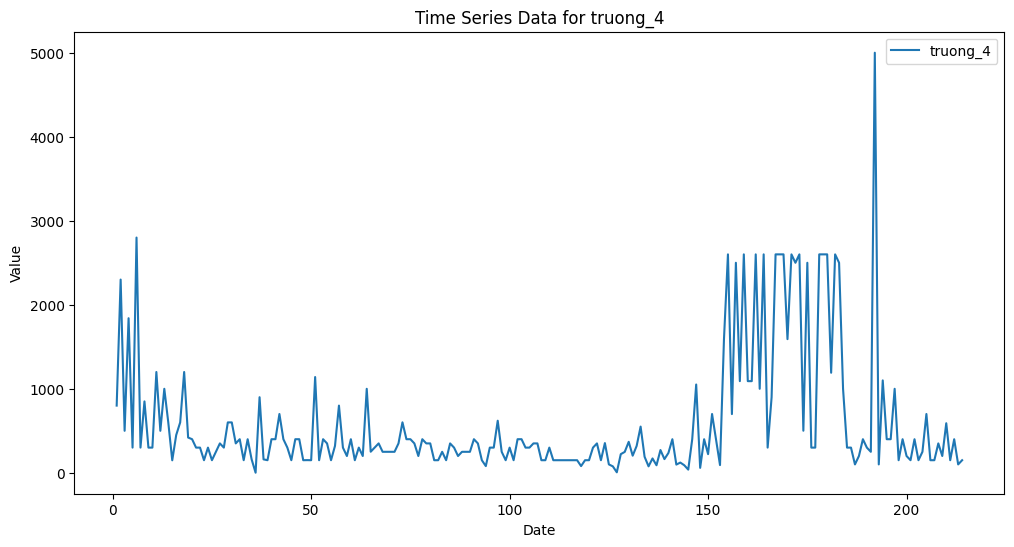

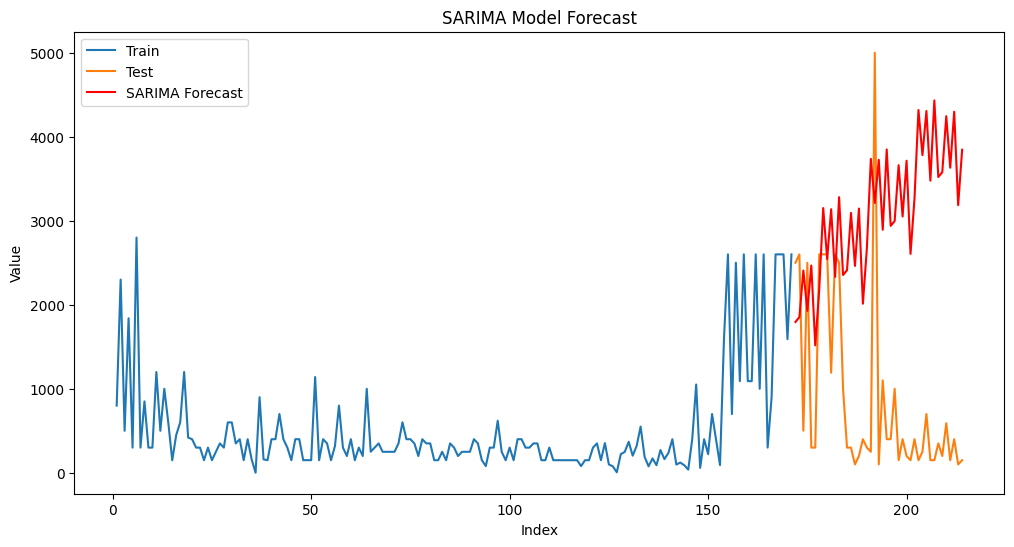

171    1794.238849
172    1851.559471
173    2406.640882
174    1926.277599
175    2466.307064
176    1515.631131
177    2183.171249
178    3150.014200
179    2542.732555
180    3136.641071
181    2331.459076
182    3279.644605
183    2353.540561
184    2410.688481
185    3092.399473
186    2461.476216
187    3144.456400
188    2011.628087
189    2670.032912
190    3735.881366
191    3210.602160
192    3724.313173
193    2891.608706
194    3848.006288
195    2938.287656
196    2995.458899
197    3660.070587
198    3049.478052
199    3713.155023
200    2604.923481
201    3264.561881
202    4317.041223
203    3780.688897
204    4305.229302
205    3476.241305
206    4431.529981
207    3519.598761
208    3576.766854
209    4243.687530
210    3630.349655
211    4296.633217
212    3185.080275
213    3844.552100
Name: predicted_mean, dtype: float64


In [244]:

from statsmodels.tsa.statespace.sarimax import SARIMAX

# Chọn cột 'truong_1' để phân tích chuỗi thời gian
time_series = df['truong_4']
train_size = int(len(time_series) * 0.8)
train, test = time_series[:train_size], time_series[train_size:]
# Vẽ biểu đồ chuỗi thời gian
plt.figure(figsize=(12, 6))
plt.plot(time_series, label='truong_4')
plt.title('Time Series Data for truong_4')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# Áp dụng mô hình SARIMA
# Chọn các tham số (p, d, q) và (P, D, Q, s) cho mô hình SARIMA
p = 1
d = 1
q = 1
P = 1
D = 1
Q = 1
s = 12  # Chu kỳ mùa vụ, ví dụ 12 cho dữ liệu hàng tháng

# Khớp mô hình SARIMA
sarima_model = SARIMAX(train, order=(p, d, q), seasonal_order=(P, D, Q, s))
sarima_fit = sarima_model.fit()

forecast_steps = len(test)
sarima_forecast = sarima_fit.forecast(steps=forecast_steps)
# Vẽ biểu đồ chuỗi thời gian gốc, tập huấn luyện, tập kiểm tra và dự báo ARIMA
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test.index, sarima_forecast, label='SARIMA Forecast', color='red')
plt.title('SARIMA Model Forecast')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

# In kết quả dự báo
print(sarima_forecast)

In [245]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
# Tính các độ đo đánh giá
mae = mean_absolute_error(test, sarima_forecast)
mse = mean_squared_error(test, sarima_forecast)
rmse = np.sqrt(mse)

# In các độ đo đánh giá
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 2414.865217067114
Mean Squared Error (MSE): 7215861.445214541
Root Mean Squared Error (RMSE): 2686.235552816346
